In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

from sklearn.cluster import KMeans

In [2]:
# Load dataset
data = pd.read_csv('machinery_data.csv')

# Fill any missing values
data.fillna(method='ffill', inplace=True)

# Add new features
data['sensor_avg'] = data[['sensor_1', 'sensor_2', 'sensor_3']].mean(axis=1)
data['sensor_diff'] = data['sensor_1'] - data['sensor_2']

# Define features and targets
features = ['sensor_1', 'sensor_2', 'sensor_3', 'operational_hours', 'sensor_avg', 'sensor_diff']
target_rul = 'RUL'
target_maintenance = 'maintenance'


C:\Users\hp\AppData\Local\Temp\ipykernel_24228\1594196880.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [3]:
# Normalize features 
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])


In [4]:
# Balance the dataset for classification
majority = data[data['maintenance'] == 0]
minority = data[data['maintenance'] == 1]

minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
data_balanced = pd.concat([majority, minority_upsampled]).sample(frac=1, random_state=42).reset_index(drop=True)


In [5]:
# Split data for regression
X_reg = data[features]
y_reg = data[target_rul]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Split data for classification
X_clf = data_balanced[features]
y_clf = data_balanced[target_maintenance]
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)


In [6]:
# Training Models

In [7]:
# Regression Model
reg_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_reg = reg_model.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"📊 Regression Model MSE: {mse_reg:.2f}")

📊 Regression Model MSE: 1074.93


In [8]:
# Classification Model
clf_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Predict and evaluate
y_pred_clf = clf_model.predict(X_test_clf)
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)
print(f"🔍 Classification Model Accuracy: {accuracy_clf:.2f}")
print(classification_report(y_test_clf, y_pred_clf))

🔍 Classification Model Accuracy: 0.92
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       202
           1       0.85      1.00      0.92       175

    accuracy                           0.92       377
   macro avg       0.93      0.93      0.92       377
weighted avg       0.93      0.92      0.92       377



In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf_model = LogisticRegression()
clf_model.fit(X_train_clf, y_train_clf)

LogisticRegression()

In [10]:
# Support Vector Machine (SVM)
from sklearn.svm import SVR, SVC

# Regression
reg_model = SVR()
reg_model.fit(X_train_reg, y_train_reg)

# Classification
clf_model = SVC()
clf_model.fit(X_train_clf, y_train_clf)

SVC()

In [11]:
# KNN
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

# Regression
reg_model = KNeighborsRegressor()
reg_model.fit(X_train_reg, y_train_reg)

# Classification
clf_model = KNeighborsClassifier()
clf_model.fit(X_train_clf, y_train_clf)

KNeighborsClassifier()

In [12]:
# XGBoost Model
!pip install xgboost

In [13]:
from xgboost import XGBRegressor, XGBClassifier

# Regression
reg_model = XGBRegressor()
reg_model.fit(X_train_reg, y_train_reg)

# Classification
clf_model = XGBClassifier()
clf_model.fit(X_train_clf, y_train_clf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [14]:
# Neural Networks (MLP - Multi-Layer Perceptron)
from sklearn.neural_network import MLPRegressor, MLPClassifier

# Regression
reg_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000)
reg_model.fit(X_train_reg, y_train_reg)

# Classification
clf_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)
clf_model.fit(X_train_clf, y_train_clf)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


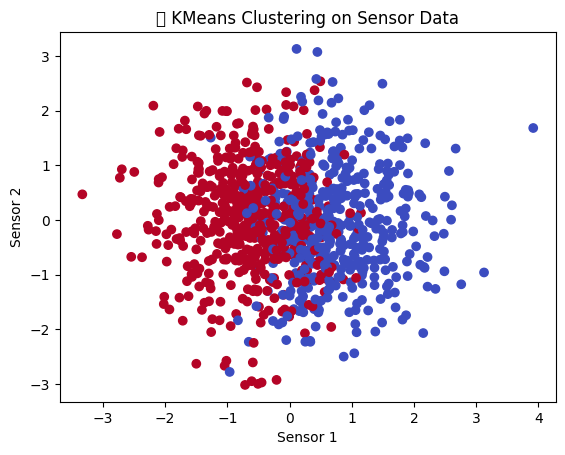

In [15]:
#Clustering for Anomaly Detection
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(data[features])

# Visualization
plt.scatter(data['sensor_1'], data['sensor_2'], c=data['cluster'], cmap='coolwarm')
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('🔎 KMeans Clustering on Sensor Data')
plt.show()


In [16]:
# Prediction Function

In [17]:
def predict_maintenance(features_input):
    # Predict RUL
    rul_pred = reg_model.predict([features_input])
    
    # Predict maintenance status
    maint_pred = clf_model.predict([features_input])
    
    # Predict anomaly
    cluster_pred = kmeans.predict([features_input])
    
    return {
        'RUL Prediction': f"{rul_pred[0]:.2f} hours",
        'Maintenance Prediction': 'Needs Maintenance' if maint_pred[0] == 1 else 'Normal',
        'Anomaly Detection': 'Anomaly' if cluster_pred[0] == 1 else 'Normal'
    }

In [18]:
# Test the Prediction
# Example input: [sensor_1, sensor_2, sensor_3, operational_hours, sensor_avg, sensor_diff]
sample_features = [0.5, -0.2, 0.3, 2000, 0.2, 0.7]
prediction = predict_maintenance(sample_features)

print("🔧 Prediction Summary")
print("------------------------")
for key, value in prediction.items():
    print(f"{key}: {value}")

🔧 Prediction Summary
------------------------
RUL Prediction: 13.27 hours
Maintenance Prediction: Normal
Anomaly Detection: Normal


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


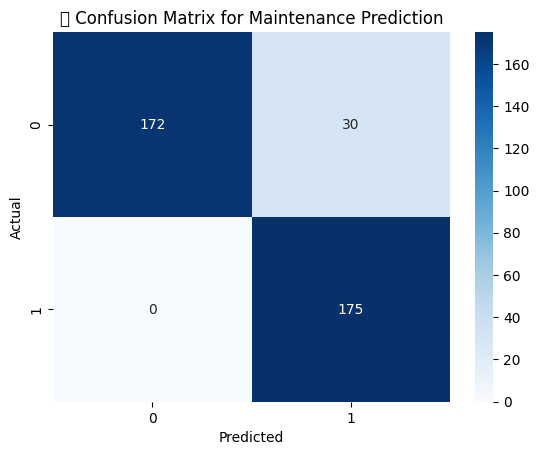

In [19]:
#  Confusion Matrix Visualization
cm = confusion_matrix(y_test_clf, y_pred_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('🧪 Confusion Matrix for Maintenance Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()